<a href="https://colab.research.google.com/github/Make1907/Google_Colab/blob/main/Placement_GA_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

iter:  0
iter:  10
iter:  20
iter:  30
iter:  40
iter:  50
iter:  60
iter:  70
iter:  80
iter:  90


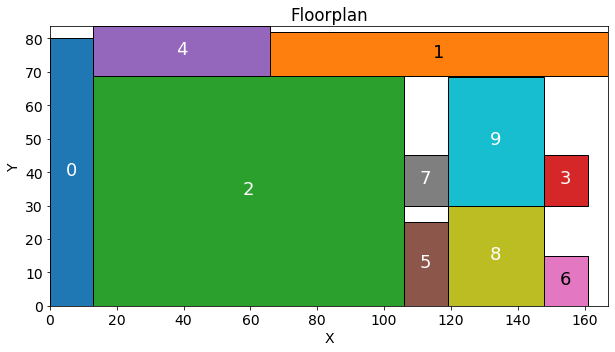

rect_data:  [[61, 15.714], [21, 55.0], [93, 68.636], [13, 15.0], [21, 35.0], [13, 25.0], [13, 15.0], [13, 15.0], [45, 20.0], [45, 25.0]]
best solution:  Solution({'sequence_pair': SequencePair(([0, 4, 1, 2, 7, 5, 9, 3, 8, 6], [0, 2, 5, 8, 7, 9, 6, 3, 4, 1])), 'floorplan': Floorplan({'positions': [{'id': 0, 'x': 0, 'y': 0.0, 'width': 13, 'height': 80.0}, {'id': 1, 'x': 66, 'y': 68.636, 'width': 101, 'height': 13.333}, {'id': 2, 'x': 13, 'y': 0.0, 'width': 93, 'height': 68.636}, {'id': 3, 'x': 148, 'y': 30.0, 'width': 13, 'height': 15.0}, {'id': 4, 'x': 13, 'y': 68.636, 'width': 53, 'height': 15.0}, {'id': 5, 'x': 106, 'y': 0.0, 'width': 13, 'height': 25.0}, {'id': 6, 'x': 148, 'y': 0.0, 'width': 13, 'height': 15.0}, {'id': 7, 'x': 106, 'y': 30.0, 'width': 13, 'height': 15.0}, {'id': 8, 'x': 119, 'y': 0.0, 'width': 29, 'height': 30.0}, {'id': 9, 'x': 119, 'y': 30.0, 'width': 29, 'height': 38.333}], 'bounding_box': (167, 83.636), 'area': 13967.212})})
best solution: (167, 83.636)
result: 

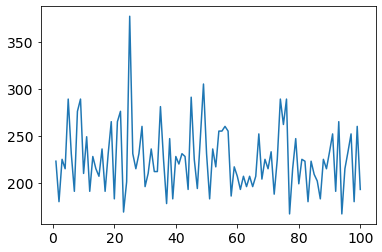

-----------------------------------
time:  1.0178989052772522 min
-----------------------------------


In [78]:
"""
Author: Michael
Create data: 2023.03.17
"""

import os
import time
import random
from functools import wraps

import pygad
import matplotlib.pyplot as plt
import rectangle_packing_solver as rps

H_MAX = 85
B_SPACING = 5
WIDTH_STEP = 8
S_RECT = [600, 800, 5600, 80, 480, 160, 80, 80, 600, 800]
# S_RECT = [600, 800, 5600, 80, 480, 160, 80, 80, 600, 800, 600, 800, 5600, 80, 480,
#           160, 80, 80, 600, 800, 600, 800, 5600, 80, 480, 160, 80, 80, 600, 800]
RECT_NUM = len(S_RECT)


def dev(fun):
    @wraps(fun)
    def wrap_the_function():
        start = time.time()
        fun()
        end = time.time()
        time_run = (end - start)/60
        print("-----------------------------------")
        print("time: ", time_run, "min")
        print("-----------------------------------")
    return wrap_the_function


# calculate the complex of the problem
def cal_complex():
    res = 1
    for i in S_RECT:
        print(i/WIDTH_STEP)
        res = res * i / WIDTH_STEP
    return res


class Placement:
    def __init__(self, s_rect, method):
        self.data = s_rect
        self.b_box_width_height = ()   # B_box width and height
        self.method = method

    def get_b_box_width_height(self):
        return self.b_box_width_height

    # random generate initial population
    def gen_rect(self):
        threshold = 170
        count = 0
        while True:
            rect_width_height = []
            height_all = 0
            max_line = 0
            for i in self.data:
                height = 100
                width = 0
                while height >= H_MAX:
                    ran_width = random.randrange(WIDTH_STEP, i / WIDTH_STEP, WIDTH_STEP)
                    width =  ran_width + B_SPACING
                    height = round((i / ran_width), 3) + B_SPACING
                    height_all += min(width, height)
                    max_line = max(max_line, max(width, height))
                rect_width_height.append([width, height])
            if height_all < threshold or max_line > 200:
                count += 1
                continue
            # print("iter num:", count, " height_all: ", height_all)
            # print("rect_width_height: ", rect_width_height)
            break
        return rect_width_height

    def solver(self, rect_data,
               idx=0,
               save=True,
               simanneal_minutes=0.01,
               simanneal_steps=10,
               height_limit=H_MAX):
        problem = rps.Problem(rectangles=rect_data)
        solution = rps.Solver().solve(problem=problem,
                                      height_limit=height_limit,
                                      show_progress=False,
                                      seed=1111,
                                      simanneal_minutes=simanneal_minutes,
                                      simanneal_steps=simanneal_steps)
        if save:
            ## save results
            # path = "./result/ga-{}.png".format(idx + 1)
            path = None
            rps.Visualizer().visualize(solution=solution, path=path)
            print(idx + 1, " solution:", solution.floorplan.bounding_box)
        self.b_box_width_height = solution.floorplan.bounding_box
        if self.method == "SA":
            return self.b_box_width_height, solution
        if self.method == "GA":
            return self.b_box_width_height,


def sa_run(method):
    width_list = []
    iter_num = 100

    placement = Placement(s_rect=S_RECT, method=method)
    min_width = float('inf')
    best_solution = None
    for i in range(iter_num):
        if i % 10 == 0:
          print("iter: ", i)
        rect_data = placement.gen_rect()
        _, solution = placement.solver(rect_data, i, save=False)
        return_first_width = placement.get_b_box_width_height()[0]
        width_list.append(return_first_width)
        if return_first_width < min_width:
            min_width = return_first_width
            best_solution = solution
    rps.Visualizer().visualize(solution=best_solution, path=None)
    print("rect_data: ", rect_data)
    print("best solution: ", best_solution)
    print("best solution:", best_solution.floorplan.bounding_box)

    print("result: ", min(width_list))
    plt.figure()
    plt.plot(list(range(1, iter_num + 1)), width_list)
    plt.show()
    plt.close()


last_fitness = 0


def ga_run(method):
    desired_output = 110
    num_generations = 2  # Number of generations.
    num_parents_mating = 2  # Number of solutions to be selected as parents in the mating pool.
    sol_per_pop = 10  # Number of solutions in the population.
    num_genes = RECT_NUM 

    placement = Placement(s_rect=S_RECT, method=method)

    def fitness_func(solution, solution_idx):
        rect_data = []
        for idx, ele in enumerate(solution):
            rect_data.append([ele + B_SPACING, S_RECT[idx] / ele +  B_SPACING])
        placement.solver(rect_data,
                         height_limit=H_MAX,
                         simanneal_minutes=0.001,
                         simanneal_steps=10,
                         save=False)
        output = placement.get_b_box_width_height()[0]
        # print("width: ", output)
        fitness = 1.0 / abs(output - desired_output)
        return fitness

    fitness_function = fitness_func

    def gen_my_gene_space():
        _my_gene_space = []
        for area in S_RECT:
            width_range = int(area / WIDTH_STEP)
            _my_gene_space_single = []
            for wid in range(0, width_range, WIDTH_STEP):
                if wid == 0 or area / wid > H_MAX:
                    continue
                _my_gene_space_single.append(wid)
            _my_gene_space.append(_my_gene_space_single)
        print("---------------------my_gene_space-----------------")
        print(_my_gene_space)
        complex_of_problem = 1

        for ele in _my_gene_space:
            complex_of_problem *= len(ele)
        print("complex_of_problem: ", complex_of_problem)

        print("---------------------my_gene_space-----------------")
        return _my_gene_space

    my_gene_space = gen_my_gene_space()

    def callback_generation(ga_instance):
        global last_fitness
        print("Generation = {generation}".format(generation=ga_instance.generations_completed))
        print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
        print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))
        last_fitness = ga_instance.best_solution()[1]

    ga_instance = pygad.GA(num_generations=num_generations,
                           num_parents_mating=num_parents_mating,
                           fitness_func=fitness_function,
                           sol_per_pop=sol_per_pop,
                           num_genes=num_genes,
                           gene_space=my_gene_space,
                           on_generation=callback_generation,
                           crossover_probability=None,
                           mutation_type="random")

    ga_instance.run()

    ga_instance.plot_fitness()

    # Returning the details of the best solution.
    solution_outer, solution_fitness, solution_idx = ga_instance.best_solution()
    print("Parameters of the best solution : {solution}".format(solution=solution_outer))
    print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
    print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

    rect_data_best_solution = []
    for idx, wid in enumerate(solution_outer):
        rect_data_best_solution.append([wid + B_SPACING, S_RECT[idx] / wid+ B_SPACING])
    print("rect_data_best_solution", rect_data_best_solution)
    placement.solver(rect_data_best_solution, save=True, simanneal_minutes=0.1, simanneal_steps=100)


@dev
def main():
    method = "SA"

    if method == "GA":
        ga_run(method)
    if method == "SA":
        sa_run(method)


if __name__ == "__main__":
    main()

---------------------my_gene_space-----------------
[[8, 16, 24, 32, 40, 48, 56, 64, 72], [16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96], [72, 80, 88, 96, 104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192, 200, 208, 216, 224, 232, 240, 248, 256, 264, 272, 280, 288, 296, 304, 312, 320, 328, 336, 344, 352, 360, 368, 376, 384, 392, 400, 408, 416, 424, 432, 440, 448, 456, 464, 472, 480, 488, 496, 504, 512, 520, 528, 536, 544, 552, 560, 568, 576, 584, 592, 600, 608, 616, 624, 632, 640, 648, 656, 664, 672, 680, 688, 696], [8], [8, 16, 24, 32, 40, 48, 56], [8, 16], [8], [8], [8, 16, 24, 32, 40, 48, 56, 64, 72], [16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96]]
complex_of_problem:  10839906
---------------------my_gene_space-----------------
Generation = 1
Fitness    = 0.023255813953488372
Change     = 0.023255813953488372
Generation = 2
Fitness    = 0.05263157894736842
Change     = 0.018410852713178293
Generation = 3
Fitness    = 0.05263157894736842
Change     = 0.0
Generation = 4
Fitness 

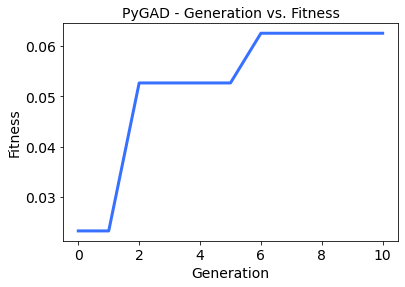

Parameters of the best solution : [16. 24. 72.  8. 32. 16.  8.  8. 32. 24.]
Fitness value of the best solution = 0.0625
Index of the best solution : 0
rect_data_best_solution:  [[21.0, 42.5], [29.0, 38.333333333333336], [77.0, 82.77777777777777], [13.0, 15.0], [37.0, 20.0], [21.0, 15.0], [13.0, 15.0], [13.0, 15.0], [37.0, 23.75], [29.0, 38.333333333333336]]


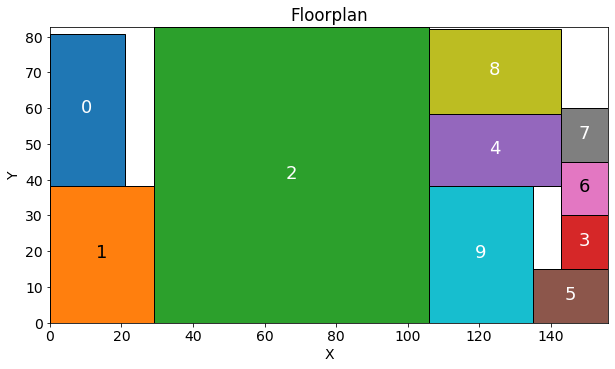

1  solution: (156.0, 82.77777777777777)
-----------------------------------
time:  10.200778381029766 min
-----------------------------------


In [6]:
"""
Author: Michael
Create data: 2023.03.17
"""

import os
import time
import random
from functools import wraps

import pygad
import matplotlib.pyplot as plt
import rectangle_packing_solver as rps

H_MAX = 85
B_SPACING = 5
WIDTH_STEP = 8
S_RECT = [600, 800, 5600, 80, 480, 160, 80, 80, 600, 800]
# S_RECT = [600, 800, 5600, 80, 480, 160, 80, 80, 600, 800, 600, 800, 5600, 80, 480,
#           160, 80, 80, 600, 800, 600, 800, 5600, 80, 480, 160, 80, 80, 600, 800]
RECT_NUM = len(S_RECT)


def dev(fun):
    @wraps(fun)
    def wrap_the_function():
        start = time.time()
        fun()
        end = time.time()
        time_run = (end - start)/60
        print("-----------------------------------")
        print("time: ", time_run, "min")
        print("-----------------------------------")
    return wrap_the_function


# calculate the complex of the problem
def cal_complex():
    res = 1
    for i in S_RECT:
        print(i/WIDTH_STEP)
        res = res * i / WIDTH_STEP
    return res


class Placement:
    def __init__(self, s_rect, method):
        self.data = s_rect
        self.b_box_width_height = ()   # B_box width and height
        self.method = method

    def get_b_box_width_height(self):
        return self.b_box_width_height

    # random generate initial population
    def gen_rect(self):
        threshold = 170
        count = 0
        while True:
            rect_width_height = []
            height_all = 0
            max_line = 0
            for i in self.data:
                height = 100
                width = 0
                while height >= H_MAX:
                    width = random.randrange(WIDTH_STEP, i / WIDTH_STEP, WIDTH_STEP) + B_SPACING
                    height = round((i / width), 3) + B_SPACING
                    height_all += min(width, height)
                    max_line = max(max_line, max(width, height))
                rect_width_height.append([width, height])
            if height_all < threshold or max_line > 200:
                count += 1
                continue
            # print("iter num:", count, " height_all: ", height_all)
            break
        return rect_width_height

    def solver(self, rect_data,
               idx=0,
               save=True,
               simanneal_minutes=0.01,
               simanneal_steps=10,
               height_limit=H_MAX):
        problem = rps.Problem(rectangles=rect_data)
        solution = rps.Solver().solve(problem=problem,
                                      height_limit=height_limit,
                                      show_progress=False,
                                      seed=1111,
                                      simanneal_minutes=simanneal_minutes,
                                      simanneal_steps=simanneal_steps)
        if save:
            ## save results
            # path = "./result/ga-{}.png".format(idx + 1)
            path = None
            rps.Visualizer().visualize(solution=solution, path=path)
            print(idx + 1, " solution:", solution.floorplan.bounding_box)
        self.b_box_width_height = solution.floorplan.bounding_box
        if self.method == "SA":
            return self.b_box_width_height, solution
        if self.method == "GA":
            return self.b_box_width_height,


def sa_run(method):
    width_list = []
    iter_num = 100

    placement = Placement(s_rect=S_RECT, method=method)
    min_width = float('inf')
    best_solution = None
    for i in range(iter_num):
        if i % 10 == 0:
          print("iter: ", i)
        rect_data = placement.gen_rect()
        _, solution = placement.solver(rect_data, i, save=False)
        return_first_width = placement.get_b_box_width_height()[0]
        width_list.append(return_first_width)
        if return_first_width < min_width:
            min_width = return_first_width
            best_solution = solution
    print("rect_data: ", rect_data)
    rps.Visualizer().visualize(solution=best_solution, path=None)
    print("best solution:", best_solution.floorplan.bounding_box)

    print("result: ", min(width_list))
    plt.figure()
    plt.plot(list(range(1, iter_num + 1)), width_list)
    plt.show()
    plt.close()


last_fitness = 0


def ga_run(method):
    desired_output = 140
    num_generations = 10  # Number of generations.
    num_parents_mating = 20  # Number of solutions to be selected as parents in the mating pool.
    sol_per_pop = 100  # Number of solutions in the population.
    num_genes = RECT_NUM 

    placement = Placement(s_rect=S_RECT, method=method)

    def fitness_func(solution, solution_idx):
        rect_data = []
        for idx, ele in enumerate(solution):
            rect_data.append([ele + B_SPACING, S_RECT[idx] / ele +  B_SPACING])
        placement.solver(rect_data,
                         height_limit=H_MAX,
                         simanneal_minutes=0.001,
                         simanneal_steps=10,
                         save=False)
        output = placement.get_b_box_width_height()[0]
        # print("width: ", output)
        fitness = 1.0 / abs(output - desired_output)
        return fitness

    fitness_function = fitness_func

    def gen_my_gene_space():
        _my_gene_space = []
        for area in S_RECT:
            width_range = int(area / WIDTH_STEP)
            _my_gene_space_single = []
            for wid in range(0, width_range, WIDTH_STEP):
                if wid == 0 or area / wid > H_MAX:
                    continue
                _my_gene_space_single.append(wid)
            _my_gene_space.append(_my_gene_space_single)
        print("---------------------my_gene_space-----------------")
        print(_my_gene_space)
        complex_of_problem = 1

        for ele in _my_gene_space:
            complex_of_problem *= len(ele)
        print("complex_of_problem: ", complex_of_problem)

        print("---------------------my_gene_space-----------------")
        return _my_gene_space

    my_gene_space = gen_my_gene_space()

    def callback_generation(ga_instance):
        global last_fitness
        print("Generation = {generation}".format(generation=ga_instance.generations_completed))
        print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
        print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))
        last_fitness = ga_instance.best_solution()[1]

    ga_instance = pygad.GA(num_generations=num_generations,
                           num_parents_mating=num_parents_mating,
                           fitness_func=fitness_function,
                           sol_per_pop=sol_per_pop,
                           num_genes=num_genes,
                           gene_space=my_gene_space,
                           on_generation=callback_generation,
                           crossover_probability=None,
                           mutation_type="random")

    ga_instance.run()

    ga_instance.plot_fitness()

    # Returning the details of the best solution.
    solution_outer, solution_fitness, solution_idx = ga_instance.best_solution()
    print("Parameters of the best solution : {solution}".format(solution=solution_outer))
    print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
    print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

    rect_data_best_solution = []
    for idx, wid in enumerate(solution_outer):
        rect_data_best_solution.append([wid + B_SPACING, S_RECT[idx] / wid + B_SPACING])
    print("rect_data_best_solution: ", rect_data_best_solution)
    placement.solver(rect_data_best_solution, save=True, simanneal_minutes=0.1, simanneal_steps=100)


@dev
def main():
    method = "GA"

    if method == "GA":
        ga_run(method)
    if method == "SA":
        sa_run(method)


if __name__ == "__main__":
    main()